# Дипломная работа по курсу «Python для анализа данных»

-    Загрузить файл hr.csv (можно найти во сложении к заданию)
-    Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
-    Рассчитать и визуализировать корреляционную матрицу для переменных
-    Визуализировать несколько взаимосвязей между переменными
-    С использованием t-test статистики проверить взаимосвязи между несколькими переменными
-    Рассчитать сколько работников работает в каждом департаменте
-    Показать распределение сотрудников по зарплатам
-    Показать распределение сотрудников по зарплатам совместно с департаментами
-    Сколько сотрудников покинули компанию
-    Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
-    Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import preprocessing
import scipy.stats as st
from scipy.stats import pearsonr

# Загрузить файл hr.csv (можно найти во сложении к заданию)

In [3]:
df = pd.read_csv('HR\HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
satisfaction_level = df['satisfaction_level']
last_evaluation = df['last_evaluation']
number_project = df['number_project']
average_montly_hours = df['average_montly_hours']
time_spend_company = df['time_spend_company']
Work_accident = df['Work_accident']
left = df['left']
promotion_last_5years = df['promotion_last_5years']
sales = df['sales']
salary = df['salary']

Average

In [24]:
print(f'Среднее значение показателя satisfaction_level равно {round(statistics.mean(satisfaction_level),2)}')
print(f'Среднее значение показателя last_evaluation равно {round(statistics.mean(last_evaluation),2)}')
print(f'Среднее значение показателя number_project равно {round(statistics.mean(number_project),2)}')
print(f'Среднее значение показателя average_montly_hours равно {round(statistics.mean(average_montly_hours),2)}')
print(f'Среднее значение показателя time_spend_company равно {round(statistics.mean(time_spend_company),2)}')
print(f'Среднее значение показателя Work_accident равно {round(statistics.mean(Work_accident),2)}')
print(f'Среднее значение показателя left равно {round(statistics.mean(left),2)}')
print(f'Среднее значение показателя promotion_last_5years равно {round(statistics.mean(promotion_last_5years),2)}')

Среднее значение показателя satisfaction_level равно 0.61
Среднее значение показателя last_evaluation равно 0.72
Среднее значение показателя number_project равно 3.8
Среднее значение показателя average_montly_hours равно 201.05
Среднее значение показателя time_spend_company равно 3.5
Среднее значение показателя Work_accident равно 0.14
Среднее значение показателя left равно 0.24
Среднее значение показателя promotion_last_5years равно 0.02


In [26]:
print(f'Медиана показателя satisfaction_level равно {round(statistics.median(satisfaction_level),2)}')
print(f'Медиана показателя last_evaluation равно {round(statistics.median(last_evaluation),2)}')
print(f'Медиана показателя number_project равно {round(statistics.median(number_project),2)}')
print(f'Медиана показателя average_montly_hours равно {round(statistics.median(average_montly_hours),2)}')
print(f'Медиана показателя time_spend_company равно {round(statistics.median(time_spend_company),2)}')
print(f'Медиана показателя Work_accident равно {round(statistics.median(Work_accident),2)}')
print(f'Медиана показателя left равно {round(statistics.median(left),2)}')
print(f'Медиана показателя promotion_last_5years равно {round(statistics.median(promotion_last_5years),2)}')

Медиана показателя satisfaction_level равно 0.64
Медиана показателя last_evaluation равно 0.72
Медиана показателя number_project равно 4
Медиана показателя average_montly_hours равно 200
Медиана показателя time_spend_company равно 3
Медиана показателя Work_accident равно 0
Медиана показателя left равно 0
Медиана показателя promotion_last_5years равно 0


In [28]:
print(f'Мода показателя satisfaction_level равно {round(statistics.mode(satisfaction_level),2)}')
print(f'Мода показателя last_evaluation равно {round(statistics.mode(last_evaluation),2)}')
print(f'Мода показателя number_project равно {round(statistics.mode(number_project),2)}')
print(f'Мода показателя average_montly_hours равно {round(statistics.mode(average_montly_hours),2)}')
print(f'Мода показателя time_spend_company равно {round(statistics.mode(time_spend_company),2)}')
print(f'Мода показателя Work_accident равно {round(statistics.mode(Work_accident),2)}')
print(f'Мода показателя left равно {round(statistics.mode(left),2)}')
print(f'Мода показателя promotion_last_5years равно {round(statistics.mode(promotion_last_5years),2)}')

Мода показателя satisfaction_level равно 0.1
Мода показателя last_evaluation равно 0.55
Мода показателя number_project равно 4
Мода показателя average_montly_hours равно 135
Мода показателя time_spend_company равно 3
Мода показателя Work_accident равно 0
Мода показателя left равно 0
Мода показателя promotion_last_5years равно 0


In [30]:
print(f'min показателя satisfaction_level равно {round(min(satisfaction_level),2)}')
print(f'min показателя last_evaluation равно {round(min(last_evaluation),2)}')
print(f'min показателя number_project равно {round(min(number_project),2)}')
print(f'min показателя average_montly_hours равно {round(min(average_montly_hours),2)}')
print(f'min показателя time_spend_company равно {round(min(time_spend_company),2)}')
print(f'min показателя Work_accident равно {round(min(Work_accident),2)}')
print(f'min показателя left равно {round(min(left),2)}')
print(f'min показателя promotion_last_5years равно {round(min(promotion_last_5years),2)}')

min показателя satisfaction_level равно 0.09
min показателя last_evaluation равно 0.36
min показателя number_project равно 2
min показателя average_montly_hours равно 96
min показателя time_spend_company равно 2
min показателя Work_accident равно 0
min показателя left равно 0
min показателя promotion_last_5years равно 0


In [31]:
print(f'max показателя satisfaction_level равно {round(max(satisfaction_level),2)}')
print(f'max показателя last_evaluation равно {round(max(last_evaluation),2)}')
print(f'max показателя number_project равно {round(max(number_project),2)}')
print(f'max показателя average_montly_hours равно {round(max(average_montly_hours),2)}')
print(f'max показателя time_spend_company равно {round(max(time_spend_company),2)}')
print(f'max показателя Work_accident равно {round(max(Work_accident),2)}')
print(f'max показателя left равно {round(max(left),2)}')
print(f'max показателя promotion_last_5years равно {round(max(promotion_last_5years),2)}')

max показателя satisfaction_level равно 1.0
max показателя last_evaluation равно 1.0
max показателя number_project равно 7
max показателя average_montly_hours равно 310
max показателя time_spend_company равно 10
max показателя Work_accident равно 1
max показателя left равно 1
max показателя promotion_last_5years равно 1


In [32]:
print(f'pstdev показателя satisfaction_level равно {round(statistics.pstdev(satisfaction_level),2)}')
print(f'pstdev показателя last_evaluation равно {round(statistics.pstdev(last_evaluation),2)}')
print(f'pstdev показателя number_project равно {round(statistics.pstdev(number_project),2)}')
print(f'pstdev показателя average_montly_hours равно {round(statistics.pstdev(average_montly_hours),2)}')
print(f'pstdev показателя time_spend_company равно {round(statistics.pstdev(time_spend_company),2)}')
print(f'pstdev показателя Work_accident равно {round(statistics.pstdev(Work_accident),2)}')
print(f'pstdev показателя left равно {round(statistics.pstdev(left),2)}')
print(f'pstdev показателя promotion_last_5years равно {round(statistics.pstdev(promotion_last_5years),2)}')

pstdev показателя satisfaction_level равно 0.25
pstdev показателя last_evaluation равно 0.17
pstdev показателя number_project равно 1.23
pstdev показателя average_montly_hours равно 49.94
pstdev показателя time_spend_company равно 1.46
pstdev показателя Work_accident равно 0.35
pstdev показателя left равно 0.43
pstdev показателя promotion_last_5years равно 0.14


# Рассчитать и визуализировать корреляционную матрицу для переменных

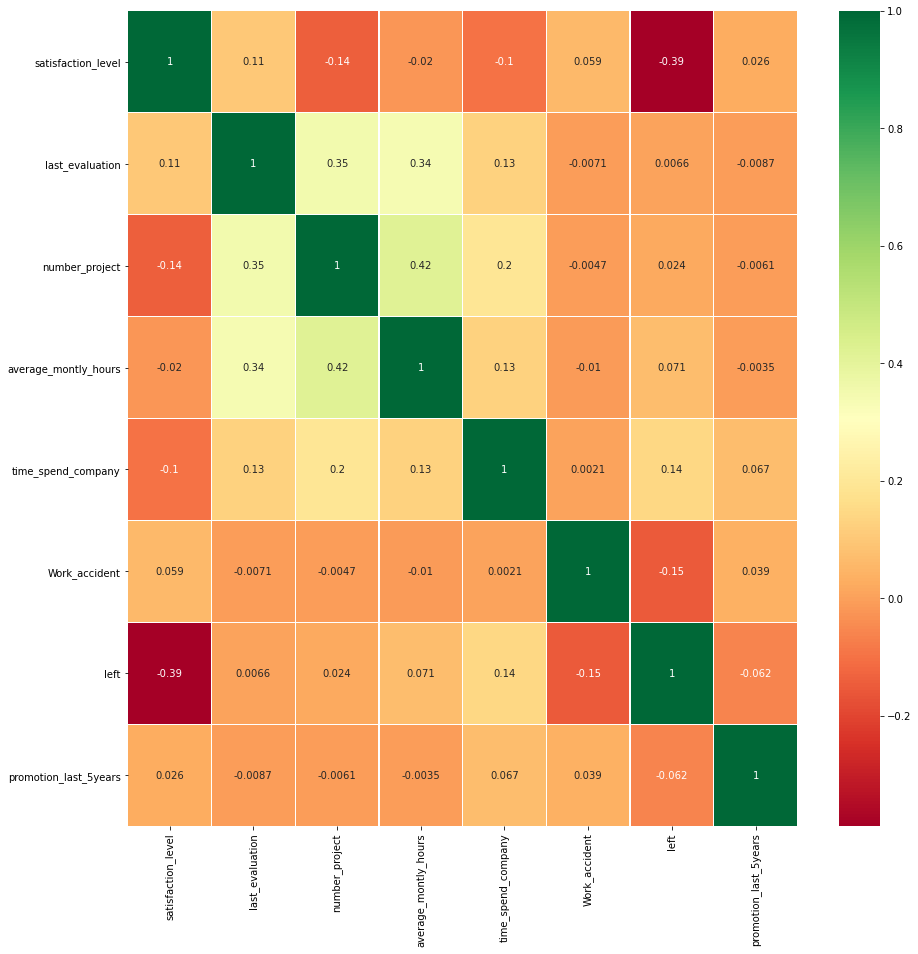

In [38]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Осмотр корреляционной матрицы позволяет выделить следующие наиболее значимые взаимосвязи, требующие дальнейшей оценки:
- прямая корреляция average_monthly_hours и number_project с коэффициентом корреляции 0,42
- обратная корреляция показателей left и satisfaction_level с коэффициентом корреляции -0,39
- прямая корреляция number_project и last_evaluation с коэффициентом корреляции 0,35
- прямая корреляция average_monthly_hours и last_evaluation с коэффициентом корреляции 0,34
- иных статистически значимых коэффициентов не обнаружено, либо применяемый критерий корреляции их не описывает

# Визуализировать несколько взаимосвязей между переменными

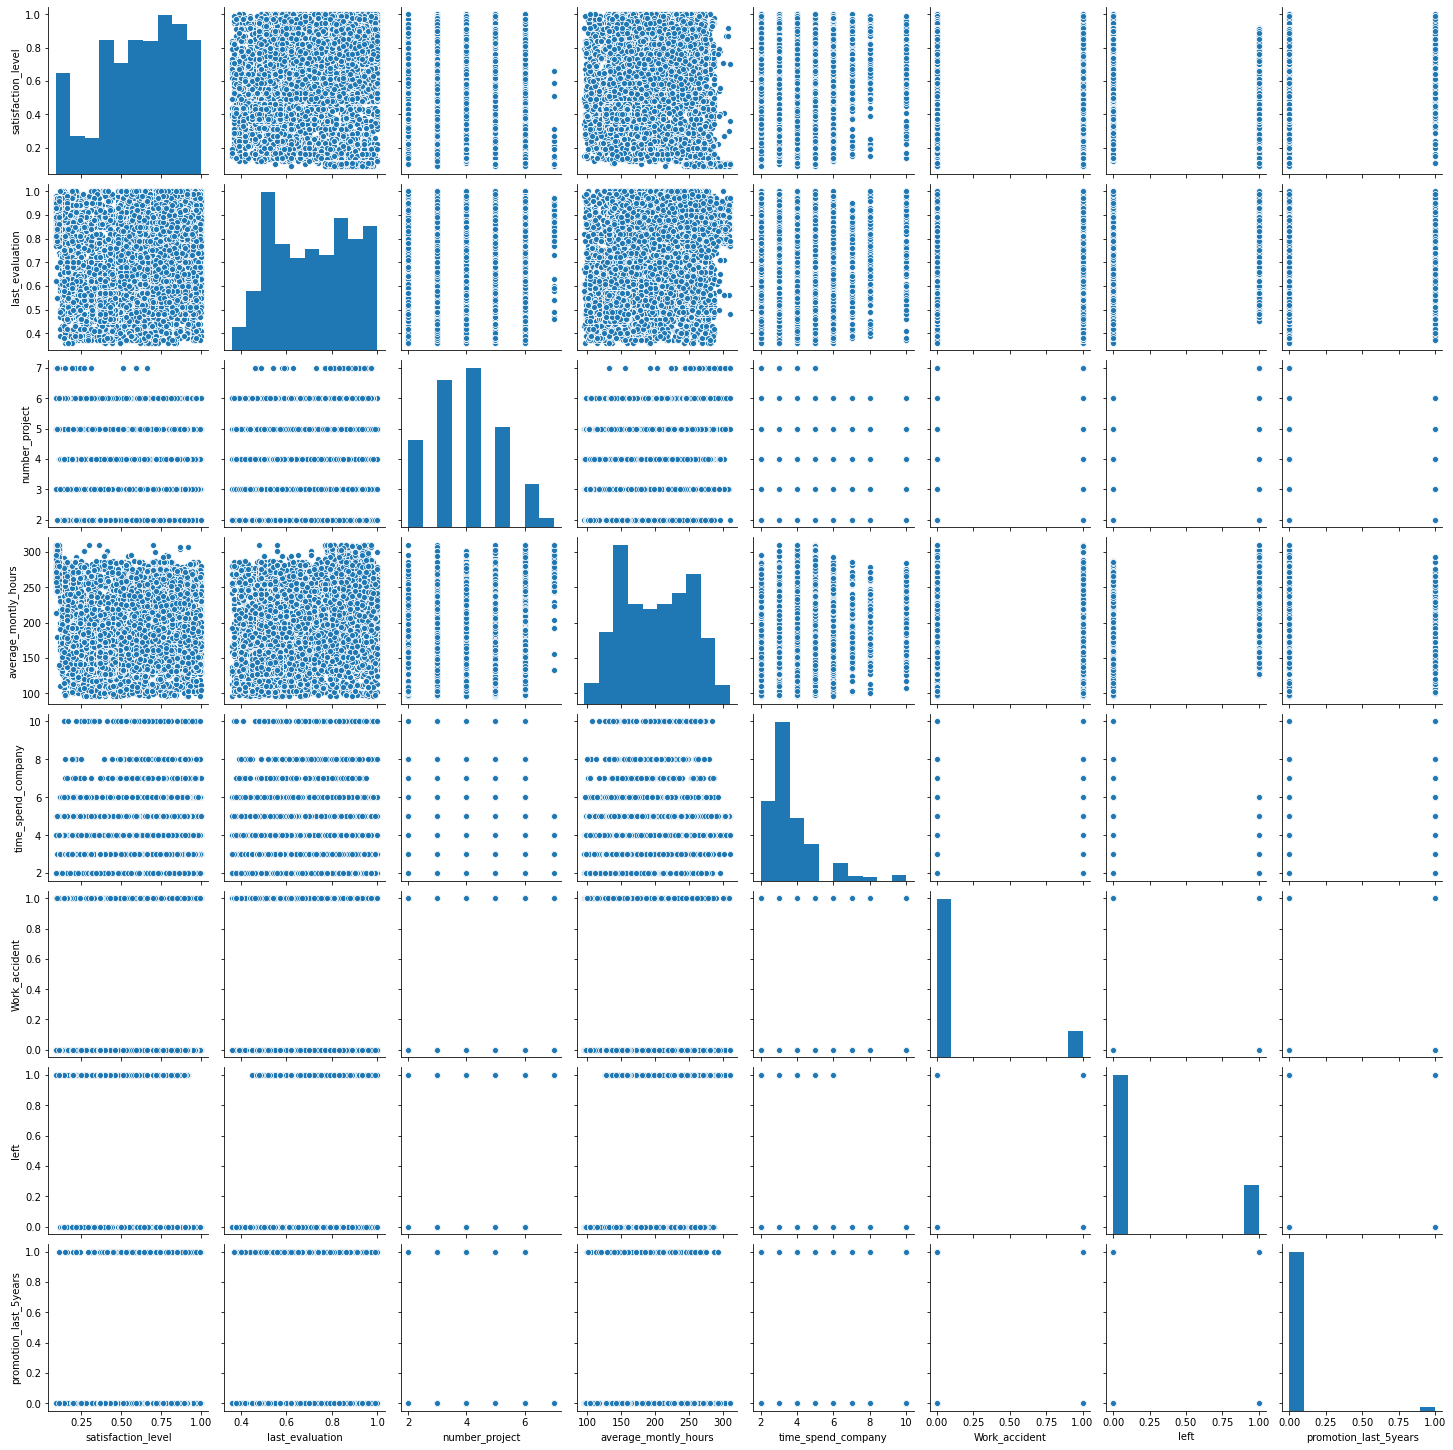

In [39]:
g = sns.pairplot(df)

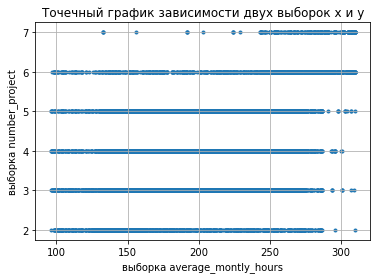

In [40]:
plt.xlabel('выборка average_montly_hours')
plt.ylabel('выборка number_project')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(average_montly_hours, number_project, marker='.')

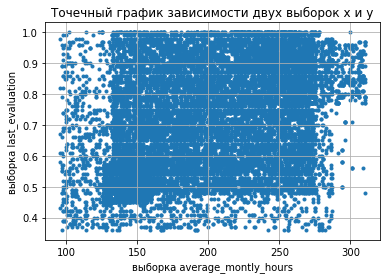

In [7]:
plt.xlabel('выборка average_montly_hours')
plt.ylabel('выборка last_evaluation')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(average_montly_hours, last_evaluation, marker='.')

Можно выдвинуть гипотезу о том, что с ростом количества отработанных часов растет количество проектов, в которых задействован сотрудник. Визуальный анализ подтверждает предположение из корреляционной матрицы. <br><br>
При этом построение точеченого графика average_montly_hours и last_evaluation сделать подобный вывод не позволяет.  
<br><br>
Иных явных взаимосвязей на графиках не обнаружено. 

# С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [118]:
headers = list(df.columns.values)[:-2]

In [119]:
df_to_norm = df.loc[:,headers]

In [120]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df_to_norm)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm = df_norm.join(df[['sales','salary']])
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,sales,low
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,sales,medium
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,sales,medium
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,sales,low
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,sales,low


In [121]:
def fun(num):   
    if num == 'low': 
        return -1  
    elif num == 'medium': 
        return 0  
    else: 
        return 1

In [122]:
df_norm['salary'] = df_norm.salary.apply(fun)

In [124]:
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,sales,-1
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,sales,0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,sales,0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,sales,-1
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,sales,-1


При помощи Двухвыборочнго t-критерия для независимых выборок проверим гипотезы: 
- H0 - не имеетя статистического различия между показателем average_montly_hours для уволившихся и оставшихся работников;
- H1 - группы по показателю average_montly_hours для уволившихся и оставшихся работников статистически отличаются.

In [125]:
left_average_montly_hours = df_norm[df_norm['left']==1]['average_montly_hours']

worker_average_montly_hours = df_norm[df_norm['left']==-1]['average_montly_hours']

print(stats.ttest_ind(left_average_montly_hours, worker_average_montly_hours))

Ttest_indResult(statistic=8.752254731850012, pvalue=2.311303556753948e-18)


Высокий показатель t-value=8.75 и низкий показатель p-value=0 говорит о том, что группы статистически отличаются и статистически значимы.


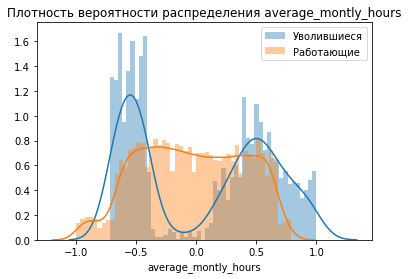

In [126]:
sns.distplot(left_average_montly_hours, 50)
sns.distplot(worker_average_montly_hours, 50)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['Уволившиеся', 'Работающие'])
plt.show()

# Рассчитать сколько работников работает в каждом департаменте

In [44]:
employees_by_depts = df.sales.value_counts()
employees_by_depts

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Наибольшее количество сотрудников занято в подразделении продаж, технического подразделения и поддержки. 

# Показать распределение сотрудников по зарплатам

In [54]:
employees_by_salary = df.salary.value_counts()
employees_by_salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

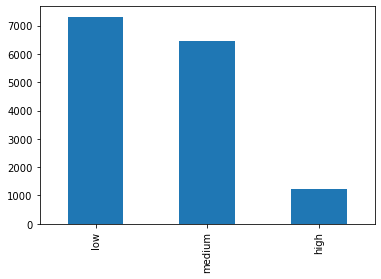

In [85]:
employees_by_salary.plot(kind='bar')

Среди всех работников в выборке преобладает низкий и средний уровень оплаты труда. Номинально бОльшая часть работников получает низкую оплату труда. 

# Показать распределение сотрудников по зарплатам совместно с департаментами

In [86]:
employees_by_salary_and_depts = df[['sales','salary','satisfaction_level']].groupby(['sales','salary']) \
                                    .count().unstack('salary') \
                                        .rename(columns={"satisfaction_level": "employees"})
employees_by_salary_and_depts

employees             
salary           high   low medium
sales                             
IT                 83   609    535
RandD              51   364    372
accounting         74   358    335
hr                 45   335    359
management        225   180    225
marketing          80   402    376
product_mng        68   451    383
sales             269  2099   1772
support           141  1146    942
technical         201  1372   1147

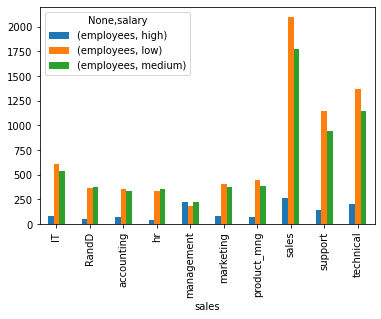

In [87]:
employees_by_salary_and_depts.plot(kind='bar')

Рассматрим разделение по уровню ЗП в разрезе подразделений.

Наибольшее количество сотрудников с низким уровнем оплаты труда:
1. sales
2. technical
3. support

Наибольшее количество сотрудников с средним уровнем оплаты труда:
1. sales
2. technical
3. support

Наибольшее количество сотрудников с высоким уровнем оплаты труда:
1. managment
2. sales
3. technical

Уровень оплаты в остальных подразделениях преимущественно низкий и средний (в равнмом соотношении) с небольшим количеством специалистов с высоким уровнем оплаты труда. 

# Сколько сотрудников покинули компанию

In [11]:
employees_left = df[df['left'] == 1].left.count()
print(f'В рассматриваемой выборке компанию покинули {employees_left} сотрудников из {len(df)} или {round(employees_left / len(df) * 100, 0)}%')

В рассматриваемой выборке компанию покинули 3571 сотрудников из 14999 или 24.0%


24% является высоким уровнем текучести персонала. <br> Необходимо оценить причины подобной ситуации, либо проверить качество первоначальной выборки. 

# Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

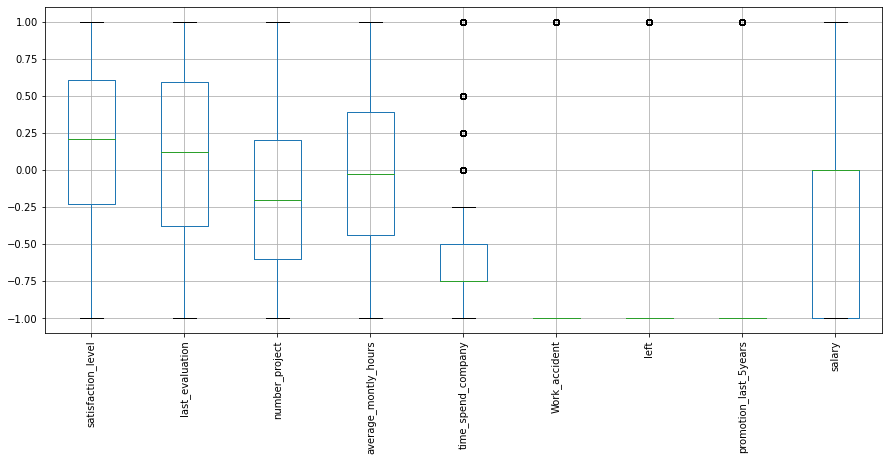

In [128]:
boxplot = df_norm.boxplot(figsize=(15,6), rot=90)

Мы знаем, что для показателей Work_accident и left знаечние 1 не является выбросом, поэтому после нормализации дополнително не очищаем данные. <br>
Проверим на тип распределения интересующие нас переменные. 

Text(0, 0.5, 'Frequency')

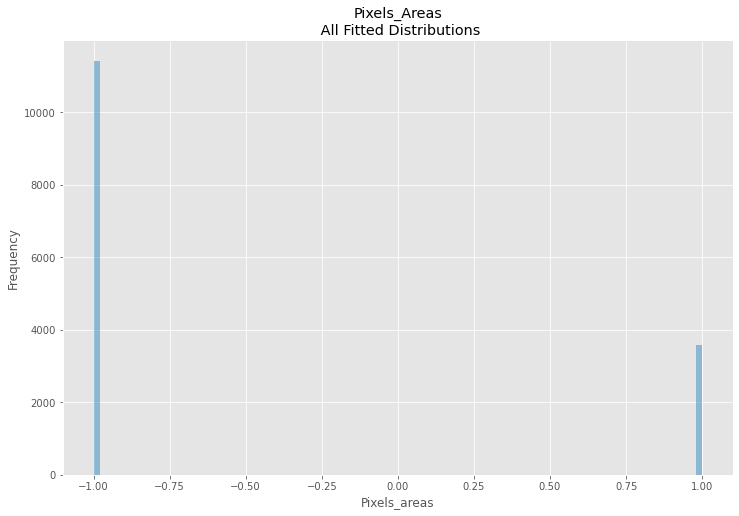

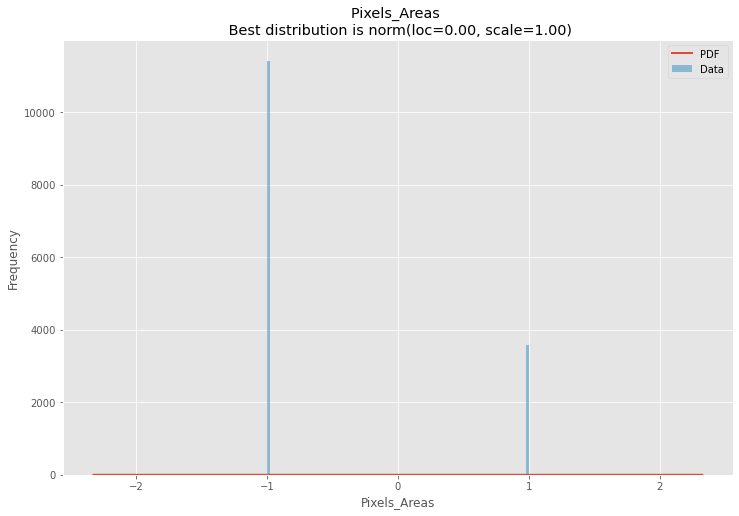

In [148]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

param_bins = 100

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df_norm['left']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=param_bins, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[1]['color'])
            #   plt.rcParams['axes.prop_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, param_bins, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Pixels_Areas\n All Fitted Distributions')
ax.set_xlabel(u'Pixels_areas')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Pixels_Areas \n Best distribution is ' + dist_str)
ax.set_xlabel(u'Pixels_Areas')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

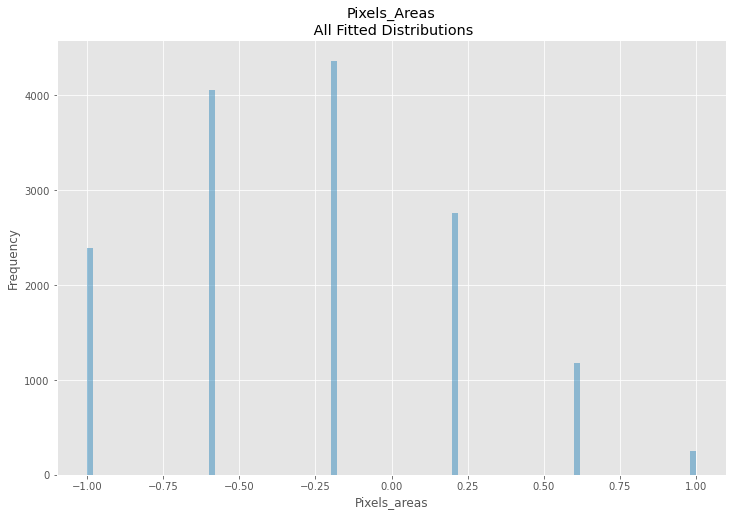

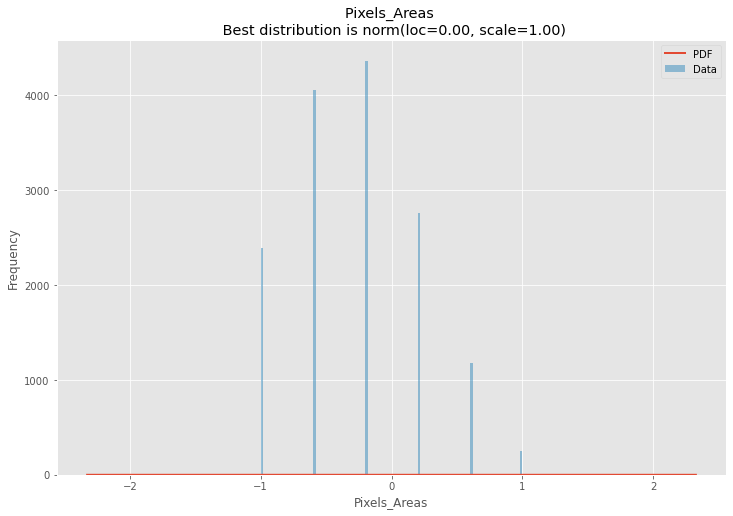

In [136]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

param_bins = 100

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df_norm['number_project']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=param_bins, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[1]['color'])
            #   plt.rcParams['axes.prop_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, param_bins, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Pixels_Areas\n All Fitted Distributions')
ax.set_xlabel(u'Pixels_areas')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Pixels_Areas \n Best distribution is ' + dist_str)
ax.set_xlabel(u'Pixels_Areas')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

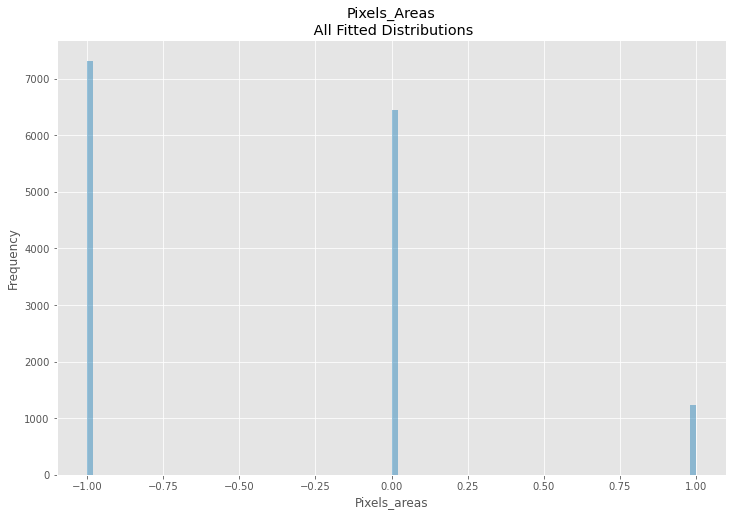

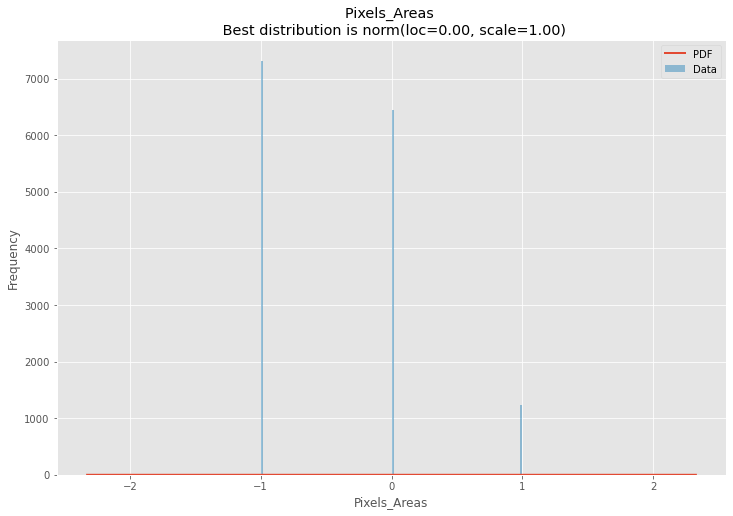

In [138]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

param_bins = 100

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df_norm['salary']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=param_bins, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[1]['color'])
            #   plt.rcParams['axes.prop_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, param_bins, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Pixels_Areas\n All Fitted Distributions')
ax.set_xlabel(u'Pixels_areas')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Pixels_Areas \n Best distribution is ' + dist_str)
ax.set_xlabel(u'Pixels_Areas')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

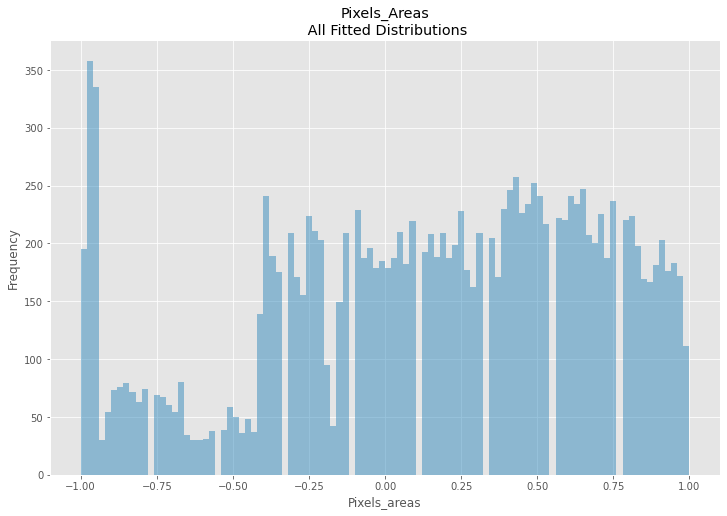

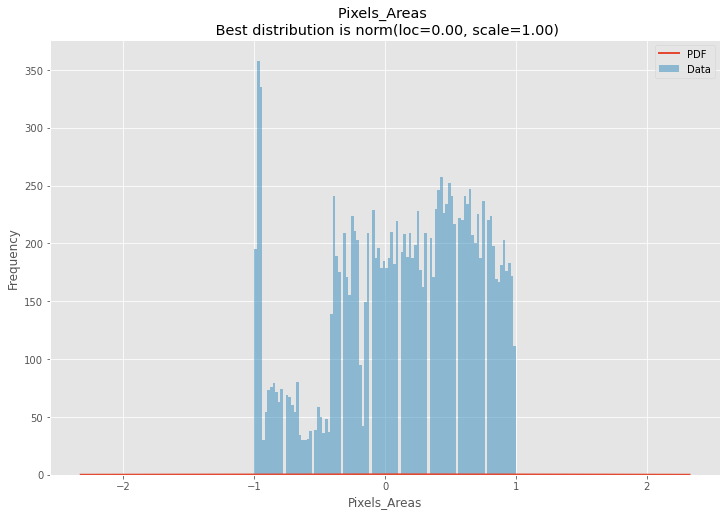

In [154]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

param_bins = 100

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df_norm['satisfaction_level']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=param_bins, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[1]['color'])
            #   plt.rcParams['axes.prop_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, param_bins, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Pixels_Areas\n All Fitted Distributions')
ax.set_xlabel(u'Pixels_areas')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Pixels_Areas \n Best distribution is ' + dist_str)
ax.set_xlabel(u'Pixels_Areas')
ax.set_ylabel('Frequency')

<br>

Гипотеза: 

- H0: среднее ЗП уволившихся равно среднему ЗП по генеральной выборке и не влияет на увольнение;
- H1: существует значительная разница в уровне ЗП уволившихся и показатель может влиять на увольнение сотрудника.

In [140]:
left_salary = df_norm[df_norm['left']==1]['salary']
stats.ttest_1samp(left_salary, df_norm['salary'].mean())

Ttest_1sampResult(statistic=-20.015242499647208, pvalue=1.4968776514078264e-84)

In [142]:
print('Количество уволившихся всего: ', len(left_salary))

Количество уволившихся всего:  3571


Оцениваем P-value. 
P-value близко к 0, что менее стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между распределением уровня ЗП у уволившихся сотрудников и генеральной совокупности в целом. <br>
График плотности распределения отражает преобладание уволившихся сотрудников с низким уровнем платы. 

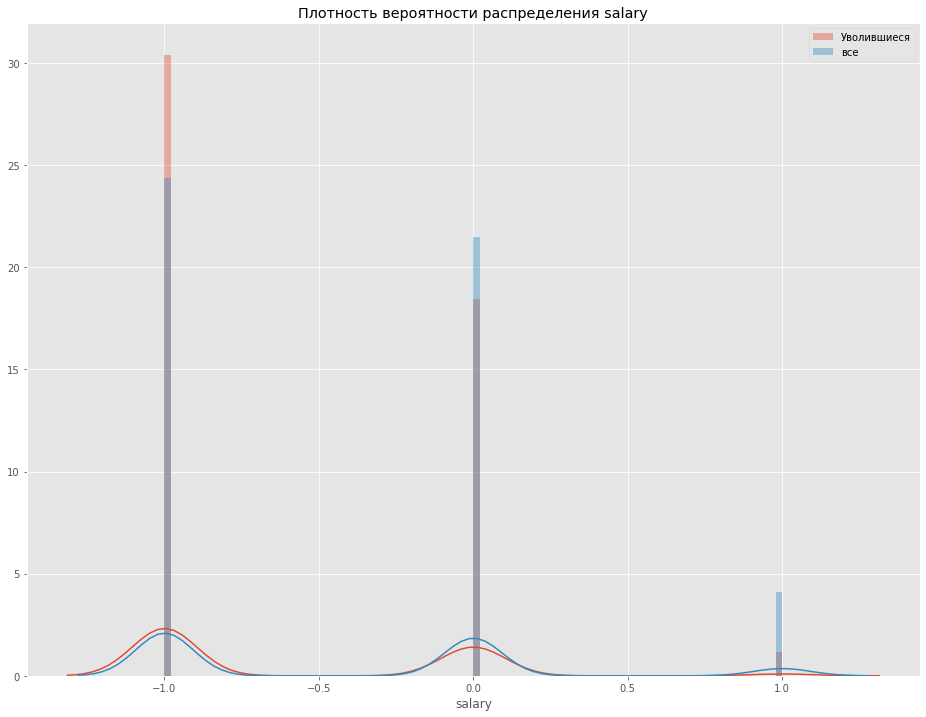

In [146]:
all_salary = df_norm['salary']
sns.distplot(left_salary, 100)
sns.distplot(all_salary, 100)
plt.title('Плотность вероятности распределения salary')
plt.legend(['Уволившиеся', 'все'])
plt.show()

<br>

In [147]:
restecg_0 = df_norm[df_norm['salary']==-1]['left']

restecg_1 = df_norm[df_norm['salary']==0]['left']

restecg_2 = df_norm[df_norm['salary']==1]['left']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

<br>

При помощи множественного теста (ANOVA) проведем тест на независимость разных уровней ЗП и увольнением сотрудника. <br> 
Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным уровнем ЗП.

<br>

Проверим при помощи Коэффициента корреляции Пирсона, существует ли зависимость между показателями number_project и left. 

- H0: number_project и left независимы
- H1: существует зависимость между number_project и left.

In [150]:
pearsonr(df_norm['number_project'], df_norm['left'])

(0.023787185071773104, 0.0035752138709379466)

Низкий коэффициент корреляции Пирсона говорит об отсутствии корреляции между number_project и увольнением сотрудника с значением p-value 0,0036. 

<br>

Проверим при помощи Коэффициента корреляции Пирсона, существует ли зависимость между показателями satisfaction_level и left. 

- H0: satisfaction_level и left независимы
- H1: существует зависимость между satisfaction_level и left.

In [155]:
pearsonr(df_norm['satisfaction_level'], df_norm['left'])

(-0.38837498342411103, 0.0)

Отрицательный коэффициент корреляции Пирсона говорит о наличии отрицательной корреляции между satisfaction_level и увольнением сотрудника с значением p-value = 0. 